In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
# Load cleaned datasets
customers = pd.read_csv('../data/customers_cleaned.csv')
transactions_cleaned = pd.read_csv('../data/transactions_cleaned.csv')
articles_cleaned = pd.read_csv('../data/articles_cleaned.csv')

# Display sample data
print("Sample Customers Data:")
display(customers.head())

print("\nSample Transactions Data:")
display(transactions_cleaned.head())

print("\nSample Articles Data:")
display(articles_cleaned.head())

Sample Customers Data:


,customer_id,FN,Active,club_member_status,fashion_news_frequency,age,postal_code
0,00000dbacae5abe5e23885899a1fa44253a17956c6d1c3...,0.0,0.0,ACTIVE,NONE,49.0,52043ee2162cf5aa7ee79974281641c6f11a68d276429a...
1,0000423b00ade91418cceaf3b26c6af3dd342b51fd051e...,0.0,0.0,ACTIVE,NONE,25.0,2973abc54daa8a5f8ccfe9362140c63247c5eee03f1d93...
2,000058a12d5b43e67d225668fa1f8d618c13dc232df0ca...,0.0,0.0,ACTIVE,NONE,24.0,64f17e6a330a85798e4998f62d0930d14db8db1c054af6...
3,00005ca1c9ed5f5146b52ac8639a40ca9d57aeff4d1bd2...,0.0,0.0,ACTIVE,NONE,54.0,5d36574f52495e81f019b680c843c443bd343d5ca5b1c2...
4,00006413d8573cd20ed7128e53b7b13819fe5cfc2d801f...,1.0,1.0,ACTIVE,Regularly,52.0,25fa5ddee9aac01b35208d01736e57942317d756b32ddd...



Sample Transactions Data:


,t_dat,customer_id,article_id,price,sales_channel_id
0,2018-09-20,000058a12d5b43e67d225668fa1f8d618c13dc232df0ca...,663713001,0.050831,2
1,2018-09-20,000058a12d5b43e67d225668fa1f8d618c13dc232df0ca...,541518023,0.030492,2
2,2018-09-20,00007d2de826758b65a93dd24ce629ed66842531df6699...,505221004,0.015237,2
3,2018-09-20,00007d2de826758b65a93dd24ce629ed66842531df6699...,685687003,0.016932,2
4,2018-09-20,00007d2de826758b65a93dd24ce629ed66842531df6699...,685687004,0.016932,2



Sample Articles Data:


,article_id,product_code,prod_name,product_type_no,product_type_name,product_group_name,graphical_appearance_no,graphical_appearance_name,colour_group_code,colour_group_name,...,department_name,index_code,index_name,index_group_no,index_group_name,section_no,section_name,garment_group_no,garment_group_name,detail_desc
0,108775015,108775,Strap top,253,Vest top,Garment Upper body,1010016,Solid,9,Black,...,Jersey Basic,A,Ladieswear,1,Ladieswear,16,Womens Everyday Basics,1002,Jersey Basic,Jersey top with narrow shoulder straps.
1,108775044,108775,Strap top,253,Vest top,Garment Upper body,1010016,Solid,10,White,...,Jersey Basic,A,Ladieswear,1,Ladieswear,16,Womens Everyday Basics,1002,Jersey Basic,Jersey top with narrow shoulder straps.
2,108775051,108775,Strap top (1),253,Vest top,Garment Upper body,1010017,Stripe,11,Off White,...,Jersey Basic,A,Ladieswear,1,Ladieswear,16,Womens Everyday Basics,1002,Jersey Basic,Jersey top with narrow shoulder straps.
3,110065001,110065,OP T-shirt (Idro),306,Bra,Underwear,1010016,Solid,9,Black,...,Clean Lingerie,B,Lingeries/Tights,1,Ladieswear,61,Womens Lingerie,1017,"Under-, Nightwear","Microfibre T-shirt bra with underwired, moulde..."
4,110065002,110065,OP T-shirt (Idro),306,Bra,Underwear,1010016,Solid,10,White,...,Clean Lingerie,B,Lingeries/Tights,1,Ladieswear,61,Womens Lingerie,1017,"Under-, Nightwear","Microfibre T-shirt bra with underwired, moulde..."


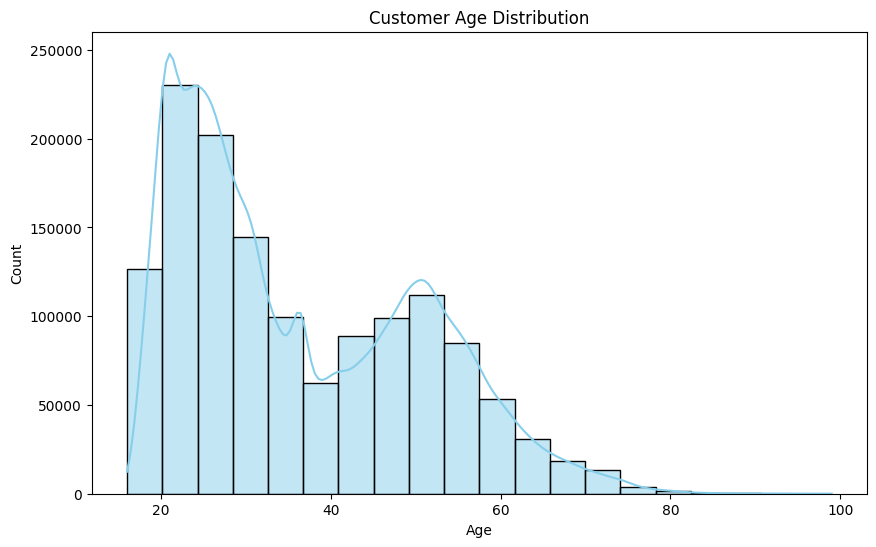

In [5]:
# Plot customer age distribution
plt.figure(figsize=(10,6))
sns.histplot(customers['age'].dropna(), bins=20, kde=True, color="skyblue")
plt.title('Customer Age Distribution')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()

/var/folders/jx/wgc4gs5n3g3gsh1lw4khhs580000gn/T/ipykernel_47683/11279412.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_articles.index, y=top_articles.values, palette="Blues_d")


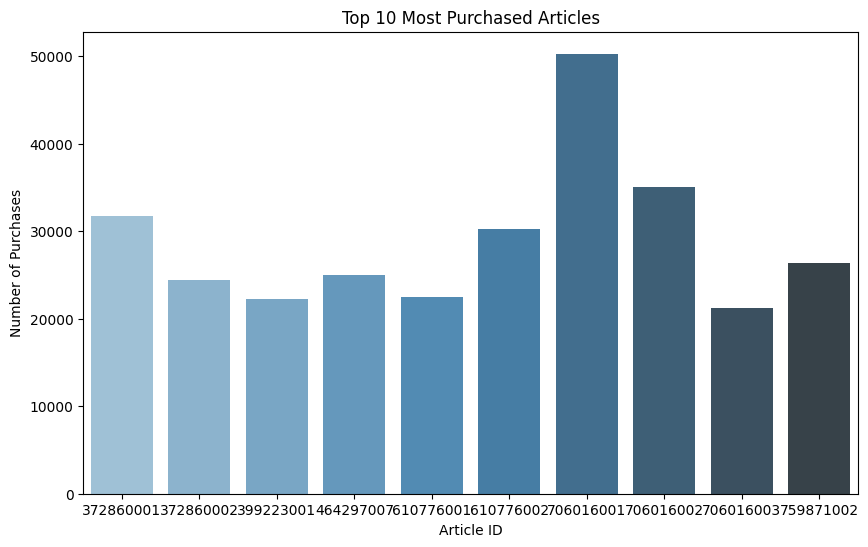

In [6]:
# Top 10 purchased articles
top_articles = transactions_cleaned['article_id'].value_counts().head(10)

plt.figure(figsize=(10,6))
sns.barplot(x=top_articles.index, y=top_articles.values, palette="Blues_d")
plt.title('Top 10 Most Purchased Articles')
plt.xlabel('Article ID')
plt.ylabel('Number of Purchases')
plt.show()


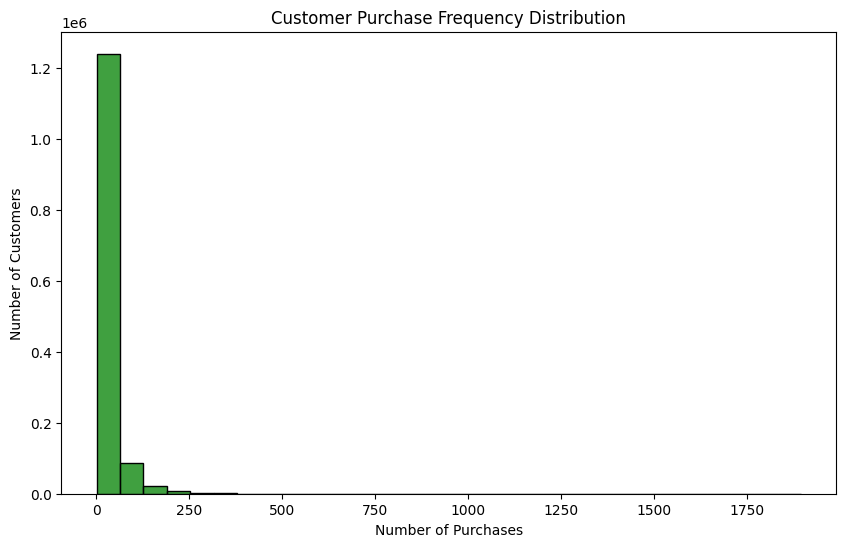

In [7]:
# Customer purchase frequency
customer_purchase_freq = transactions_cleaned['customer_id'].value_counts()

plt.figure(figsize=(10,6))
sns.histplot(customer_purchase_freq, bins=30, kde=False, color="green")
plt.title('Customer Purchase Frequency Distribution')
plt.xlabel('Number of Purchases')
plt.ylabel('Number of Customers')
plt.show()

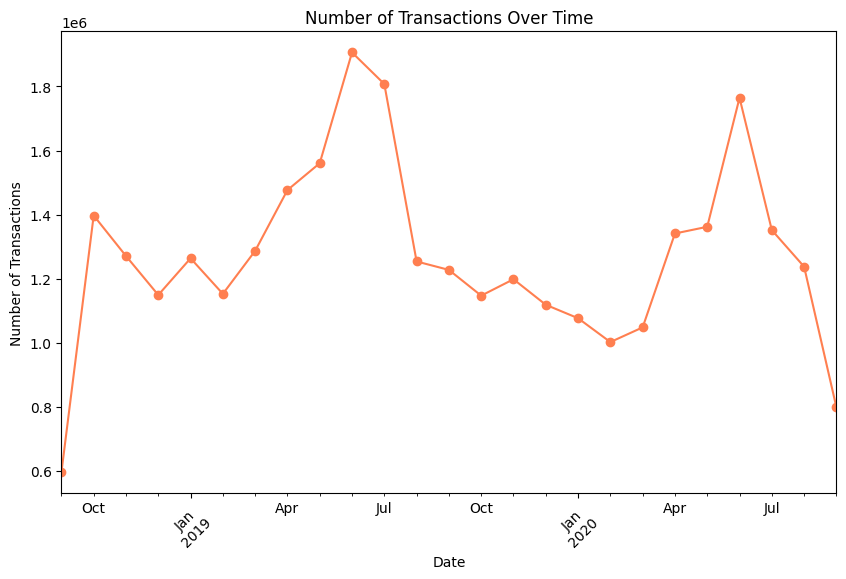

In [8]:
# Convert transaction dates to datetime
transactions_cleaned['t_dat'] = pd.to_datetime(transactions_cleaned['t_dat'])

# Sales over time (by month)
sales_over_time = transactions_cleaned.groupby(transactions_cleaned['t_dat'].dt.to_period('M')).size()

plt.figure(figsize=(10,6))
sales_over_time.plot(kind='line', marker='o', color="coral")
plt.title('Number of Transactions Over Time')
plt.xlabel('Date')
plt.ylabel('Number of Transactions')
plt.xticks(rotation=45)
plt.show()

/var/folders/jx/wgc4gs5n3g3gsh1lw4khhs580000gn/T/ipykernel_47683/1762154082.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y='product_type_name', data=articles_cleaned, order=articles_cleaned['product_type_name'].value_counts().index, palette="coolwarm")


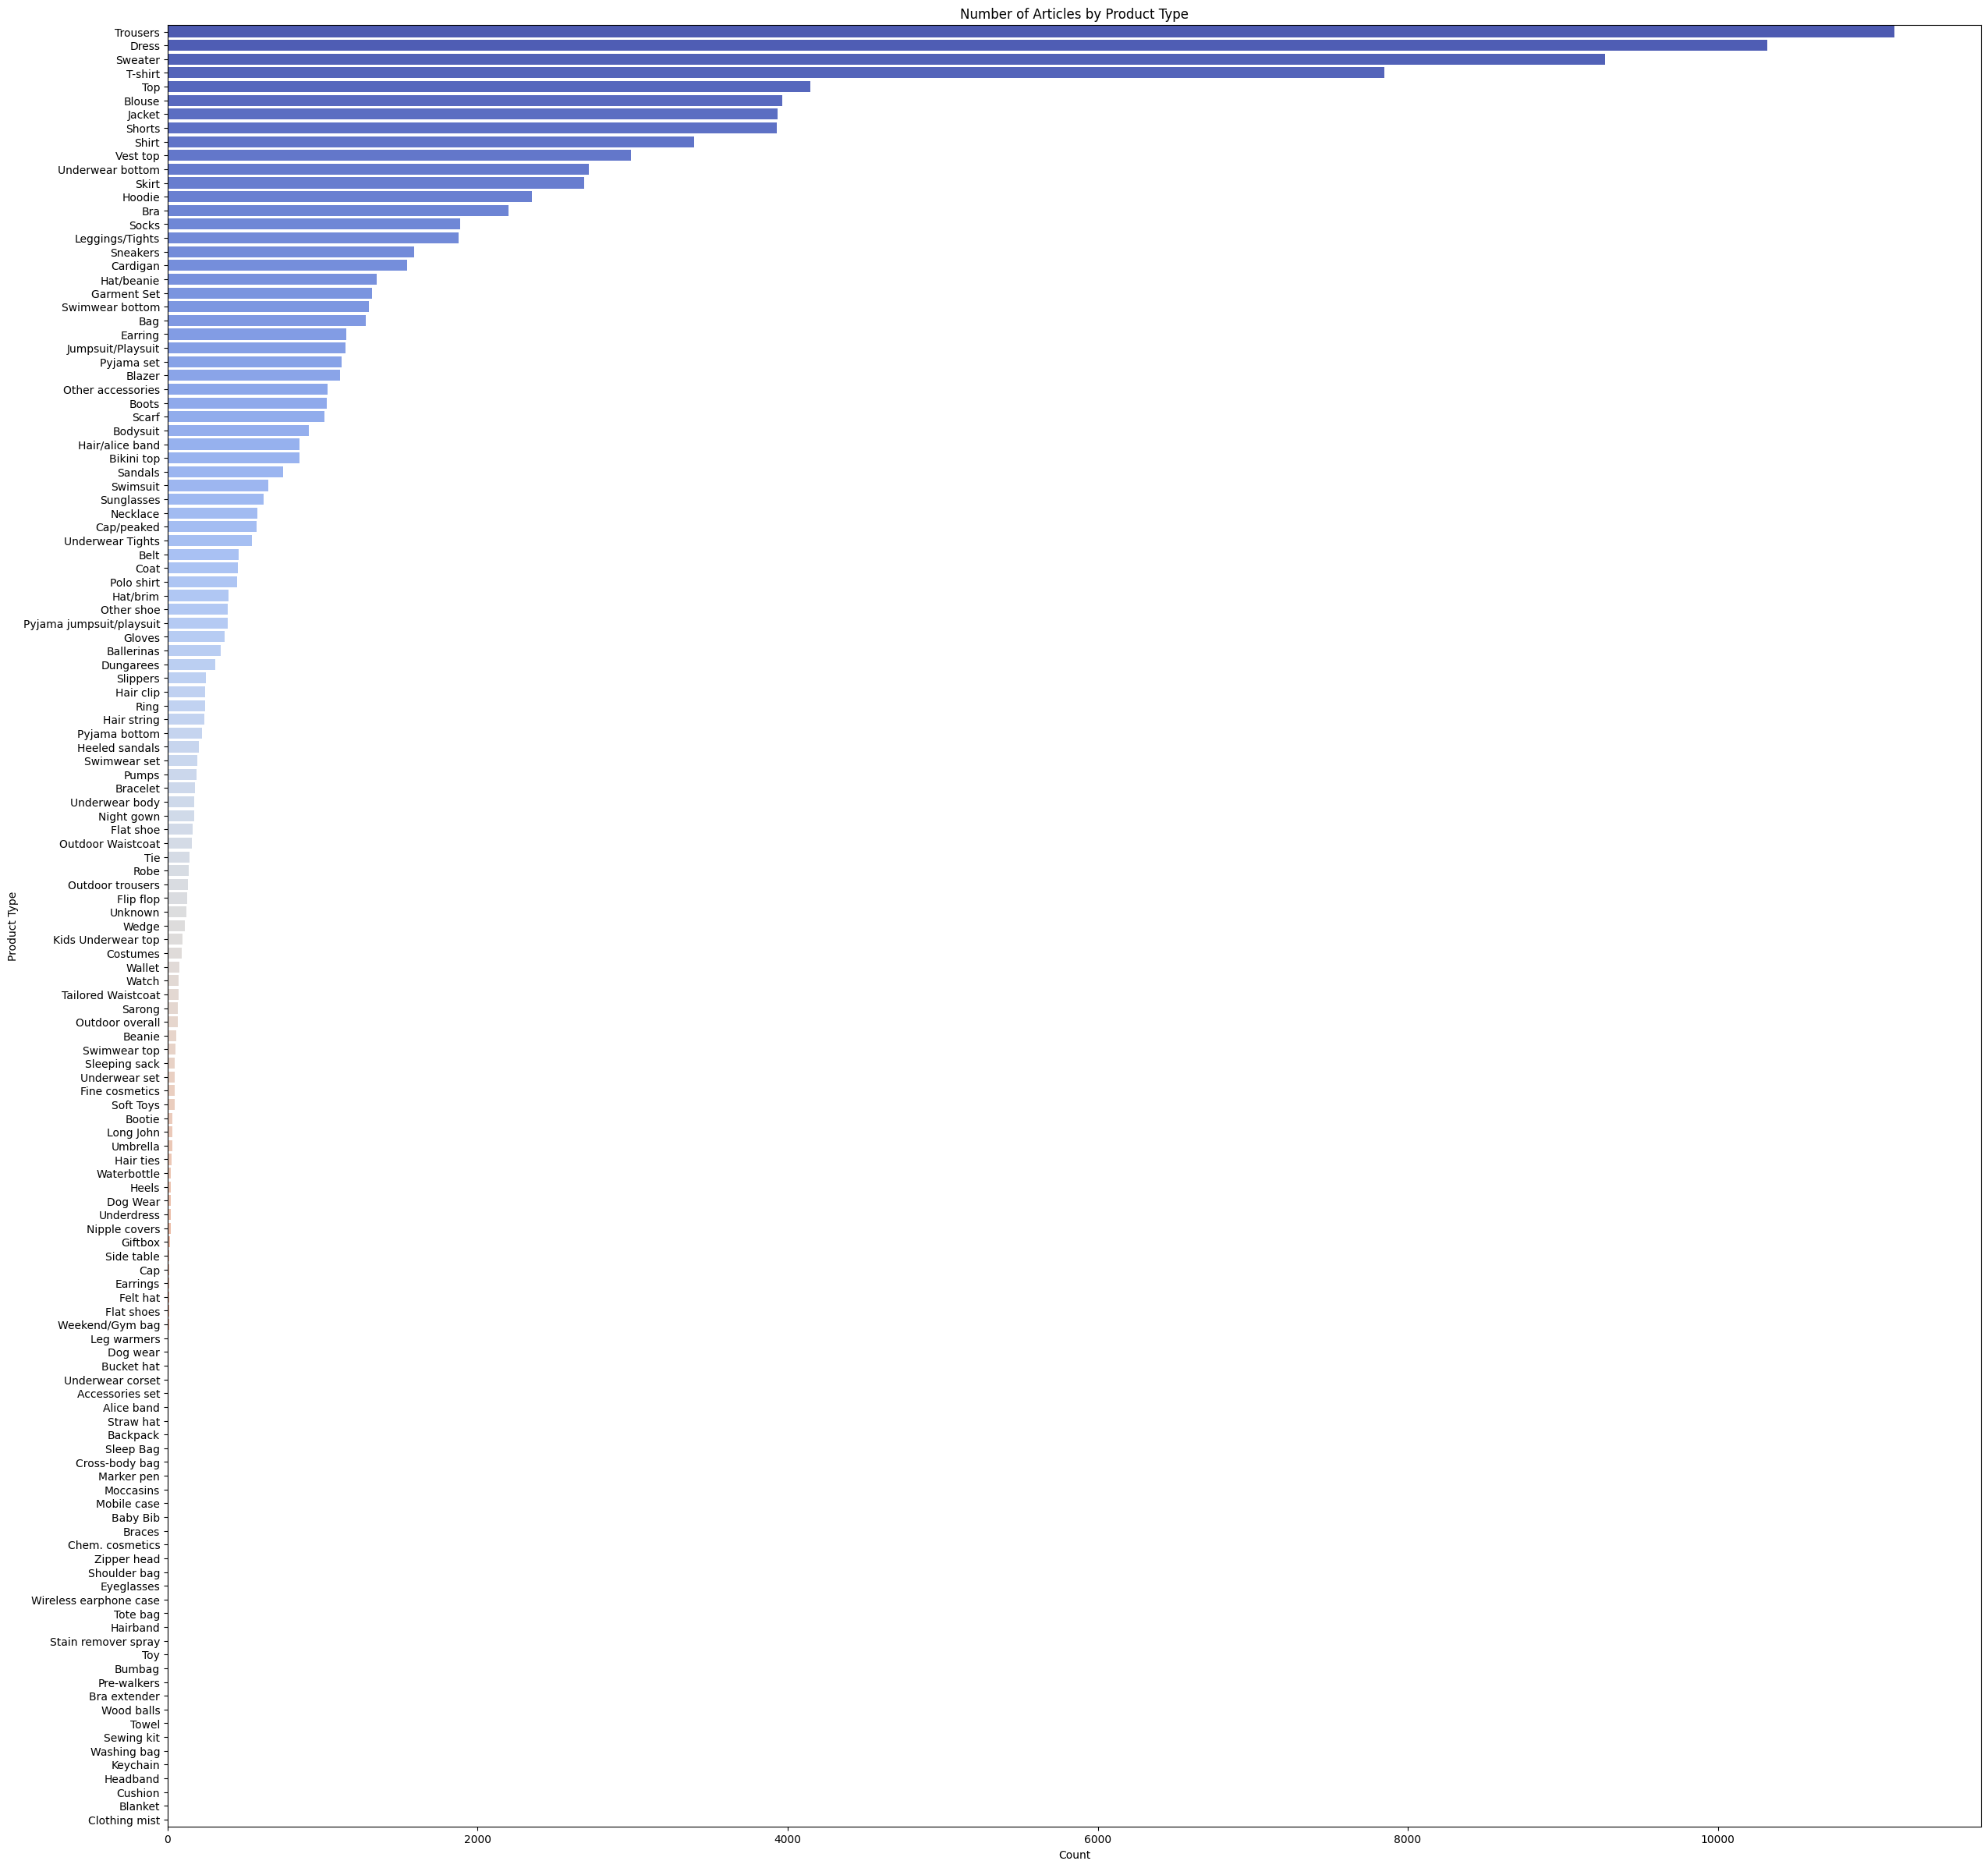

In [11]:
# Plot the number of articles by product type
plt.figure(figsize=(30,30))
sns.countplot(y='product_type_name', data=articles_cleaned, order=articles_cleaned['product_type_name'].value_counts().index, palette="coolwarm")
plt.title('Number of Articles by Product Type')
plt.xlabel('Count')
plt.ylabel('Product Type')
plt.show()

/var/folders/jx/wgc4gs5n3g3gsh1lw4khhs580000gn/T/ipykernel_47683/3134144778.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y='department_name', data=articles_cleaned, order=articles_cleaned['department_name'].value_counts().index, palette="Spectral")


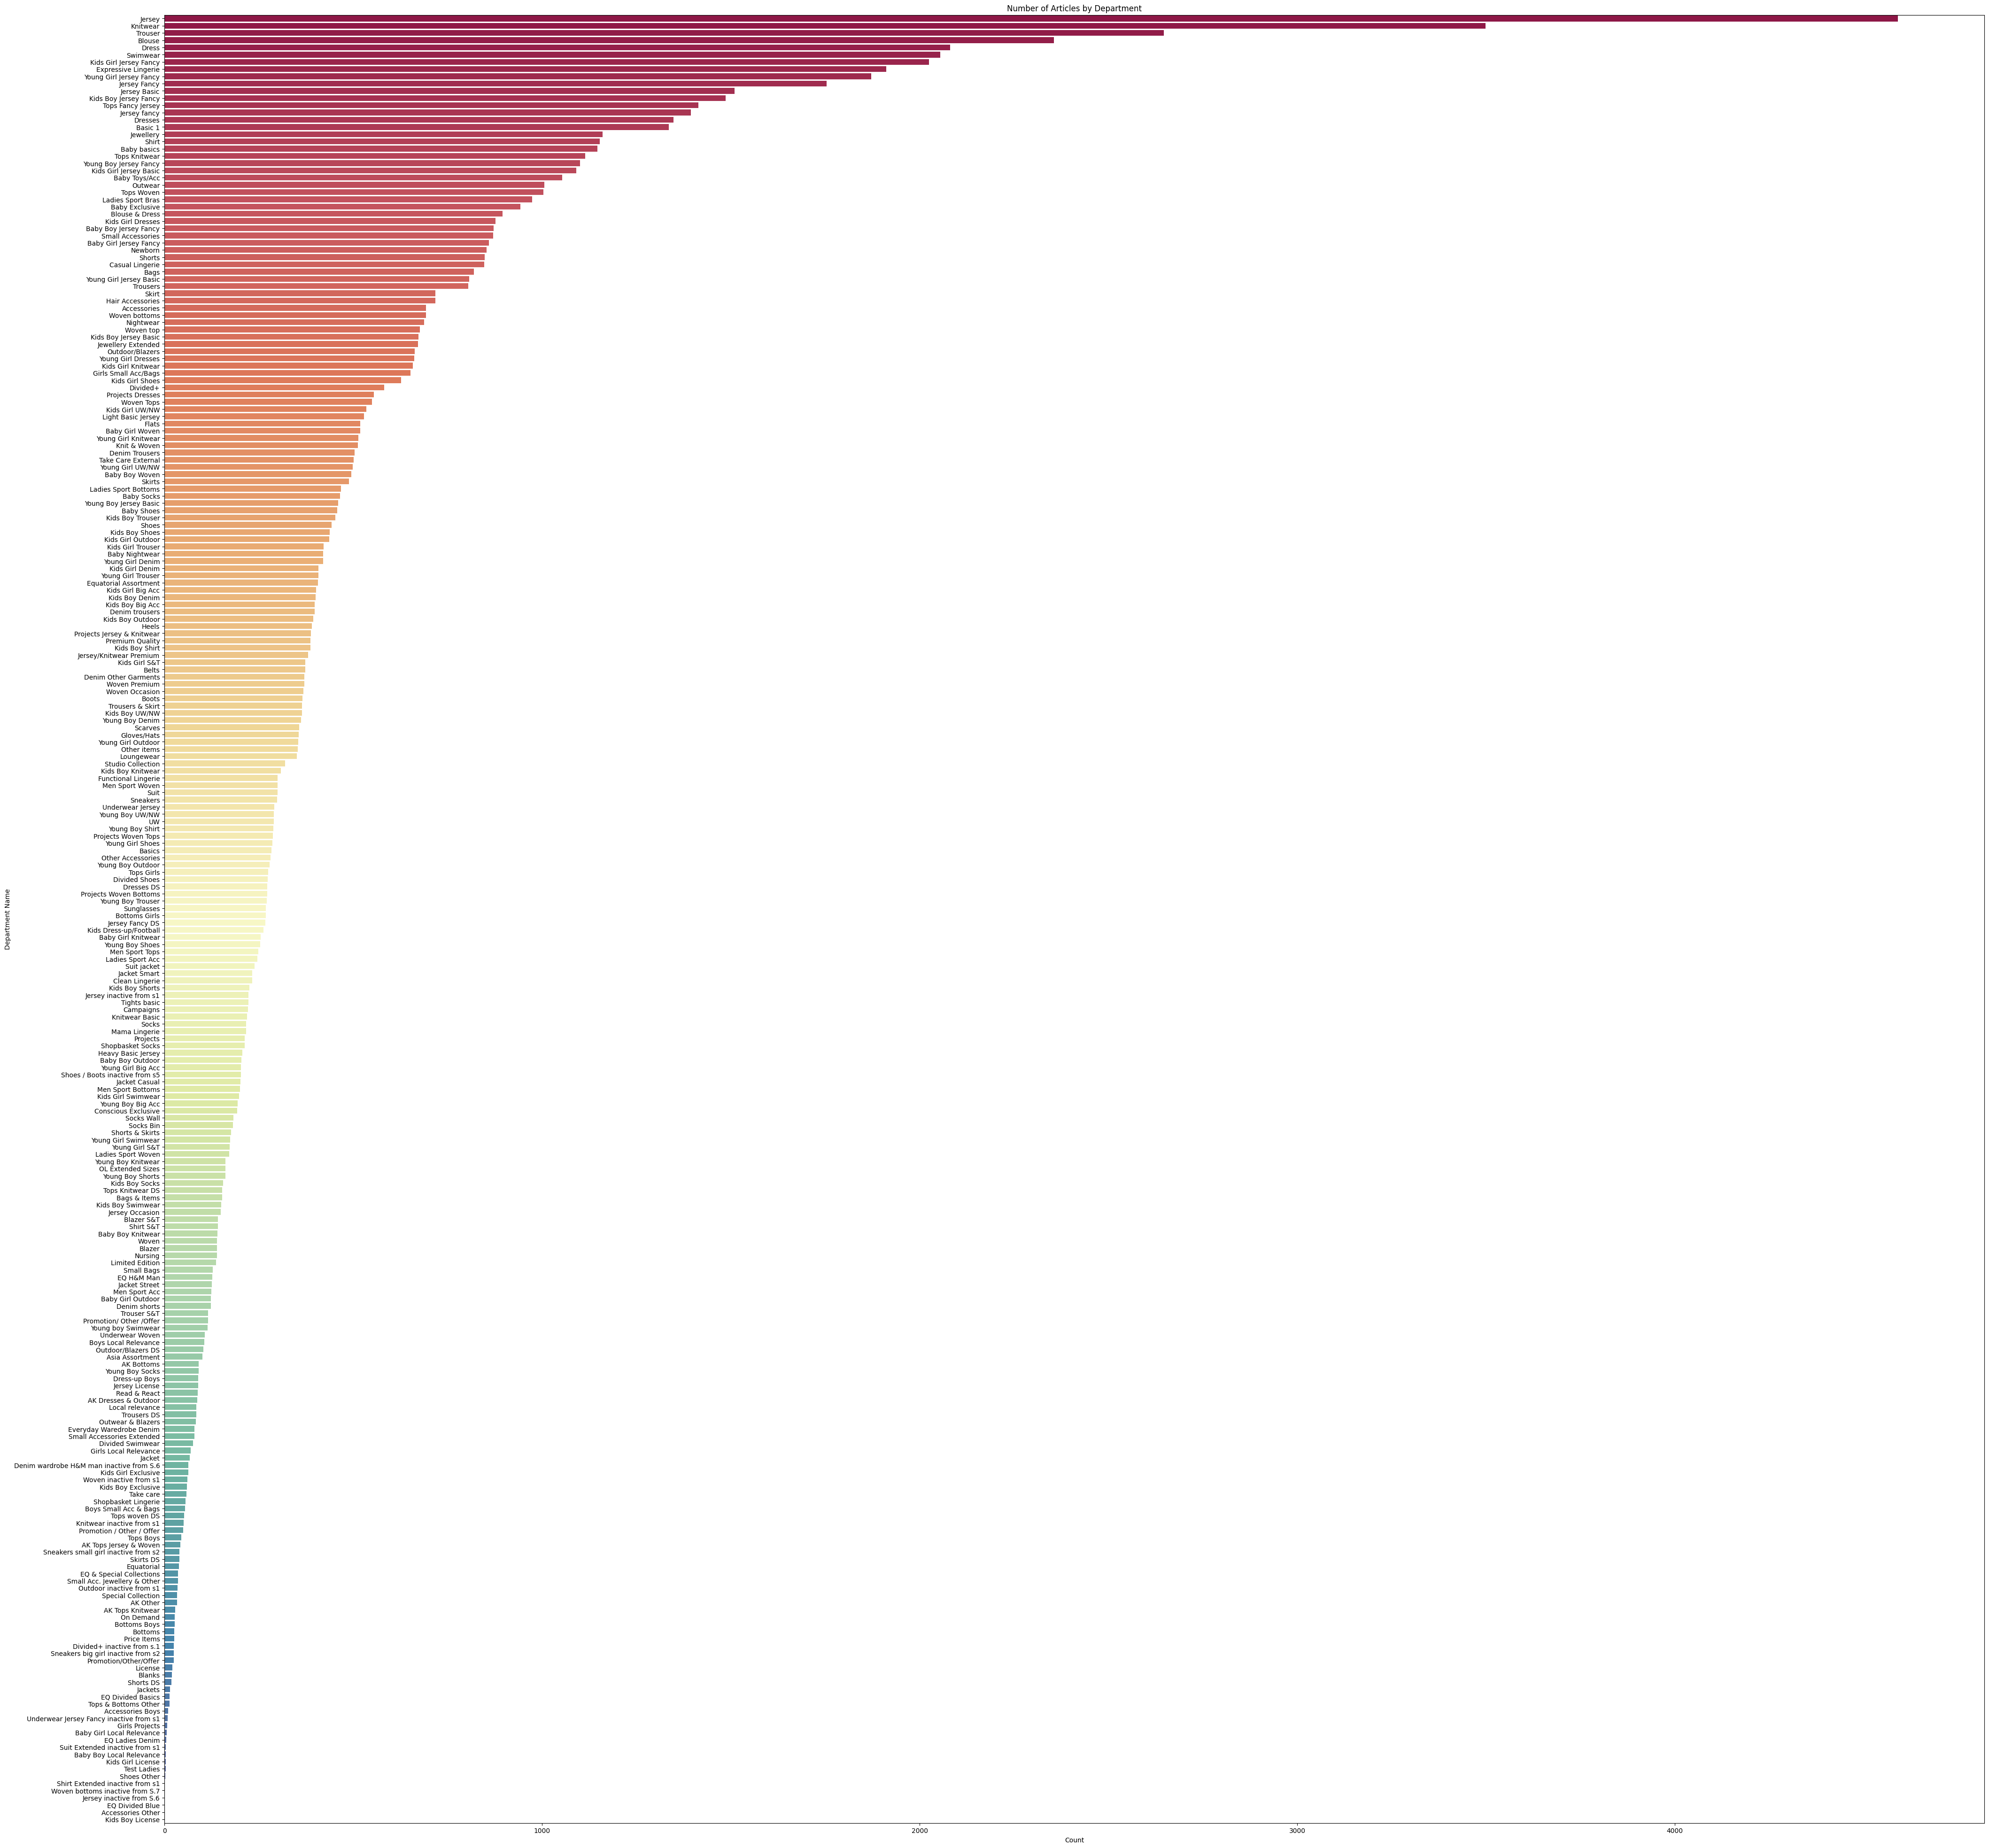

In [14]:
# Plot the number of articles by department
plt.figure(figsize=(50,50))
sns.countplot(y='department_name', data=articles_cleaned, order=articles_cleaned['department_name'].value_counts().index, palette="Spectral")
plt.title('Number of Articles by Department')
plt.xlabel('Count')
plt.ylabel('Department Name')
plt.show()